Red neuronal recurrente LSTM multicapa para predecir el último valor de una secuencia de valores
recio de las acciones de TESLA

In [351]:
import math
import matplotlib.pyplot as plt
import keras
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping

In [352]:
df=pd.read_csv("TSLA.csv")
print("Number of rows and columns:", df.shape)
df.head(5)

Number of rows and columns: (1259, 7)


,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-07-10,52.444000,52.599998,51.563999,51.830002,51.830002,13054500
1,2015-07-13,52.450001,52.509998,51.209999,52.431999,52.431999,14801500
2,2015-07-14,52.419998,53.198002,52.102001,53.130001,53.130001,9538000
3,2015-07-15,53.348000,53.498001,52.416000,52.627998,52.627998,10108000
4,2015-07-16,52.844002,53.439999,52.632000,53.335999,53.335999,8080000


El siguiente paso es dividir los datos en conjuntos de entrenamiento y prueba para evitar el sobreajuste y poder investigar la capacidad de generalización de nuestro modelo.

El valor objetivo que se va a predecir será el valor del precio de las acciones de “cierre”.

In [353]:
#La funcion ILOC de pandas posiciona en la columa OPEN
training_set = df.iloc[:800, 1:2].values
test_set = df.iloc[800:, 1:2].values

Es una buena idea normalizar los datos antes de ajustar el modelo. Esto aumentará el rendimiento.

In [354]:
# Feature Scaling
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)
#Creación de una estructura de datos con 60 time-steps y 1 salida
X_train = []
y_train = []

#################################################
#Ej
#for i in range(2,5):
#
#X_train
#t-s   i
#0-1 | 1
#1-2 | 2
#2-3 | 3 
#3-4 | 4
#################################################
#
#y_train
#i
#2
#3
#4
#################################################

for i in range(60, 800):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])


#numpy.reshape(a, newshape, order='C')
#z.shape          - consultar dimensiones
#z.reshape(-1)    - 1 sola fila
#z.reshape(-1,1)  - n filas 1 columna
#z.reshape(-1, 2)  -n filas 2 columnas

#X_train - len(X_train)->740
#X_train[0] - len(X_train[0])->60
#(740, 60, 1)

X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

X_train.shape[1]


60

Ahora es el momento de construir el modelo. Construiremos el LSTM con 50 neuronas y 4 capas ocultas. Finalmente, asignaremos 1 neurona en la capa de salida para predecir el precio de las acciones normalizado. Usaremos la función de pérdida MSE y el optimizador de descenso de gradiente estocástico de Adam.


In [355]:
model = Sequential()

#Adding the first LSTM layer and some Dropout regularisation
#Datos de entrada X_train.shape[1] = 60 
#Datos de salida1 1
#return_sequences: booleano. Ya sea para devolver la última salida en la secuencia de salida o la secuencia completa. 
#dropout: valor entre 0 y 1. Fracción de las unidades a eliminar para la transformación lineal de las entradas

#Capa de entrada
#-------------------------------------------------------------------------------
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))
#-------------------------------------------------------------------------------
#Capas intermedias
#-------------------------------------------------------------------------------
# Adding a second LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a third LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
#-------------------------------------------------------------------------------

#Capa de salida
#-------------------------------------------------------------------------------
model.add(LSTM(units = 50))
model.add(Dropout(0.2))
#-------------------------------------------------------------------------------

# Adding the output layer
model.add(Dense(units = 1))


# Compiling the RNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
# Fitting the RNN to the Training set
model.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
740/740 [==============================] - 7s 10ms/step - loss: 0.0691
Epoch 2/100
740/740 [==============================] - 3s 4ms/step - loss: 0.0176
Epoch 3/100
740/740 [==============================] - 3s 4ms/step - loss: 0.0127
Epoch 4/100
740/740 [==============================] - 3s 4ms/step - loss: 0.0122
Epoch 5/100
740/740 [==============================] - 3s 4ms/step - loss: 0.0114
Epoch 6/100
740/740 [==============================] - 3s 4ms/step - loss: 0.0110
Epoch 7/100
740/740 [==============================] - 3s 5ms/step - loss: 0.0107
Epoch 8/100
740/740 [==============================] - 3s 5ms/step - loss: 0.0101
Epoch 9/100
740/740 [==============================] - 4s 5ms/step - loss: 0.0121
Epoch 10/100
740/740 [==============================] - 4s 5ms/step - loss: 0.0099
Epoch 11/100
740/740 [==============================] - 4s 5ms/step - loss: 0.0092
Epoch 12/100
740/740 [==============================] - 4s 5ms/step - loss: 0.0095
Epoch 13/100

In [356]:
# Getting the predicted stock price of 2017
dataset_train = df.iloc[:800, 1:2] #los primeros 800 datos
dataset_test = df.iloc[800:, 1:2]  #los restantes 459 datos

In [357]:
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)


In [358]:
#print(len(dataset_total)) #1259
#print(len(dataset_test))  #459
#print(len(inputs))        #519

inputs = dataset_total[len(dataset_total) - len(dataset_test) -60:].values

In [255]:
#Ejemplo 
#from sklearn.preprocessing import MinMaxScaler
#data = [[-1, 2], [-0.5, 6], [0, 10], [1, 18]]
#print(data)
#sc.fit(data)# calcula el minimo y el maxximo que se utilizara para el escalado posterior
#print(sc.data_max_)
#print(sc.data_min_)
#data_T=sc.transform(data)
#print(data_T)




In [359]:
#inputs = inputs.reshape(-1,1) #(519, 1)
inputs = sc.transform(inputs)

X_test = []
for i in range(60, 519):
    X_test.append(inputs[i-60:i, 0])

X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
#print(X_test.shape)
#print(X_test)
# (459, 60, 1)




In [384]:
#input2 = X_test[2].reshape(1,60,1)
#print(input2)
#predicted_stock_price = model.predict(input2)
#predicted_stock_price = sc.inverse_transform(predicted_stock_price)
#print(predicted_stock_price)

In [371]:
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
predicted_stock_price

array([[ 54.118427],
       [ 55.090523],
       [ 56.339767],
       [ 57.238388],
       [ 57.66681 ],
       [ 58.233112],
       [ 57.458946],
       [ 58.094658],
       [ 58.821156],
       [ 59.19996 ],
       [ 59.39409 ],
       [ 59.60902 ],
       [ 60.64807 ],
       [ 58.23151 ],
       [ 58.013382],
       [ 59.812054],
       [ 60.66376 ],
       [ 59.789448],
       [ 57.280582],
       [ 54.54868 ],
       [ 52.188816],
       [ 51.308243],
       [ 51.056637],
       [ 51.240566],
       [ 51.425026],
       [ 51.893867],
       [ 53.468437],
       [ 54.216717],
       [ 53.96253 ],
       [ 52.98109 ],
       [ 52.2613  ],
       [ 54.48492 ],
       [ 58.977745],
       [ 61.588593],
       [ 64.4798  ],
       [ 65.32109 ],
       [ 65.28133 ],
       [ 65.63387 ],
       [ 66.52019 ],
       [ 66.75353 ],
       [ 66.51243 ],
       [ 66.742134],
       [ 67.53891 ],
       [ 68.06488 ],
       [ 68.079346],
       [ 66.35957 ],
       [ 66.12868 ],
       [ 66.4

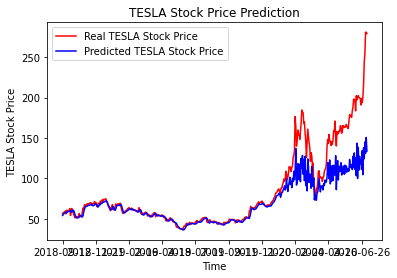

In [372]:
# Visualising the results
plt.plot(df.loc[800:, 'Date'],dataset_test.values, color = 'red', label = 'Real TESLA Stock Price')
plt.plot(df.loc[800:, 'Date'],predicted_stock_price, color = 'blue', label = 'Predicted TESLA Stock Price')
plt.xticks(np.arange(0,459,50))
plt.title('TESLA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TESLA Stock Price')
plt.legend()
plt.show()

In [386]:
from scipy.interpolate import interp1d
  
X = [1,2,3,4,5] # random x values
Y = [11,2.2,3.5,-88,1] # random y values
  
# test value
interpolate_x = 2.5
  
# Finding the interpolation
y_interp = interp1d(X, 2.0)
print("Value of Y at x = {} is".format(interpolate_x),
      y_interp(interpolate_x))

ValueError: x and y arrays must be equal in length along interpolation axis.